In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt


In [2]:
# Load MNIST dataset
(train_images, train_labels), (test_images, test_labels) = datasets.mnist.load_data()

In [3]:
# Normalize pixel values to be between 0 and 1
train_images = train_images / 255.0
test_images = test_images / 255.0

In [4]:
# Reshape images to add a channel dimension (for grayscale)
train_images = train_images.reshape((60000, 28, 28, 1))
test_images = test_images.reshape((10000, 28, 28, 1))

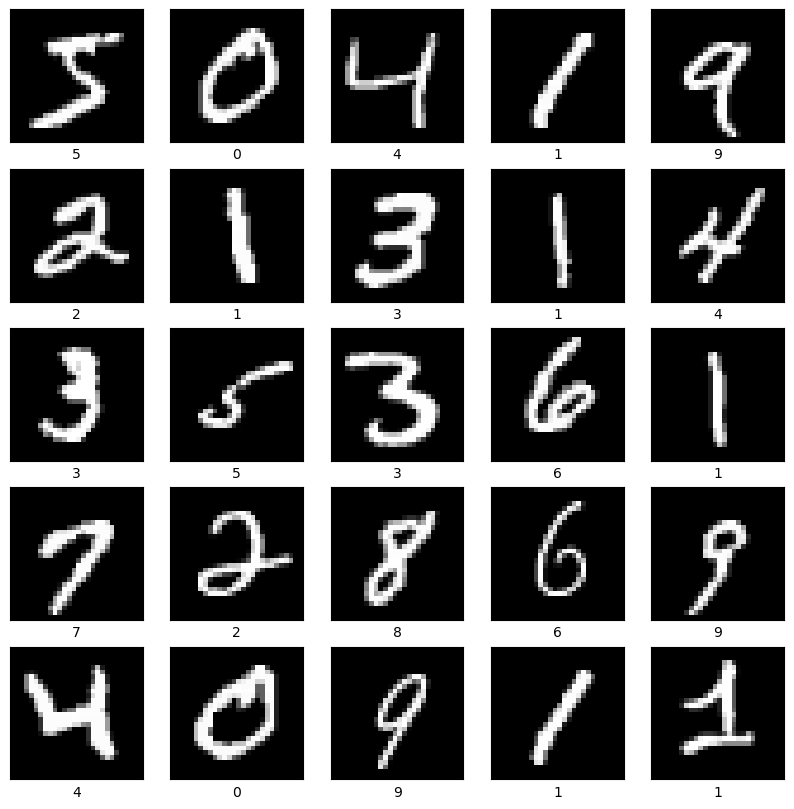

In [5]:
class_names = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

# Display some sample images
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i].reshape(28, 28), cmap='gray')
    plt.xlabel(class_names[train_labels[i]])
plt.show()


In [6]:
# Data augmentation
datagen = ImageDataGenerator(
    rotation_range=10,
    zoom_range=0.1,
    width_shift_range=0.1,
    height_shift_range=0.1
)
datagen.fit(train_images)


In [7]:
# Build the model
model = models.Sequential()
model.add(layers.Conv2D(16, (3, 3), activation='relu', input_shape=(28, 28, 1)))  # Reduced filters
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(32, (3, 3), activation='relu'))  # Reduced filters
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(32, (3, 3), activation='relu'))  # Reduced filters

model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dropout(0.5))  # Dropout added for regularization
model.add(layers.Dense(10))

C:\Users\umerm\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [8]:
# Compile the model with a lower learning rate
model.compile(optimizer=Adam(learning_rate=0.0001),  # Reduced learning rate
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [9]:
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

In [10]:
history = model.fit(datagen.flow(train_images, train_labels, batch_size=64),
                    epochs=10,
                    validation_data=(test_images, test_labels),
                    callbacks=[early_stopping])


Epoch 1/10


C:\Users\umerm\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


938/938 ━━━━━━━━━━━━━━━━━━━━ 50s 48ms/step - accuracy: 0.3015 - loss: 1.9771 - val_accuracy: 0.8945 - val_loss: 0.4671
Epoch 2/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 45s 48ms/step - accuracy: 0.7043 - loss: 0.9172 - val_accuracy: 0.9429 - val_loss: 0.2161
Epoch 3/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 43s 45ms/step - accuracy: 0.8031 - loss: 0.6275 - val_accuracy: 0.9559 - val_loss: 0.1564
Epoch 4/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 43s 45ms/step - accuracy: 0.8453 - loss: 0.5055 - val_accuracy: 0.9615 - val_loss: 0.1338
Epoch 5/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 44s 46ms/step - accuracy: 0.8611 - loss: 0.4468 - val_accuracy: 0.9658 - val_loss: 0.1124
Epoch 6/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 43s 45ms/step - accuracy: 0.8815 - loss: 0.3897 - val_accuracy: 0.9695 - val_loss: 0.0966
Epoch 7/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 43s 46ms/step - accuracy: 0.8900 - loss: 0.3621 - val_accuracy: 0.9716 - val_loss: 0.0925
Epoch 8/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 43s 45ms/step - accuracy: 0.8993 - loss: 0.3387 - val_accurac

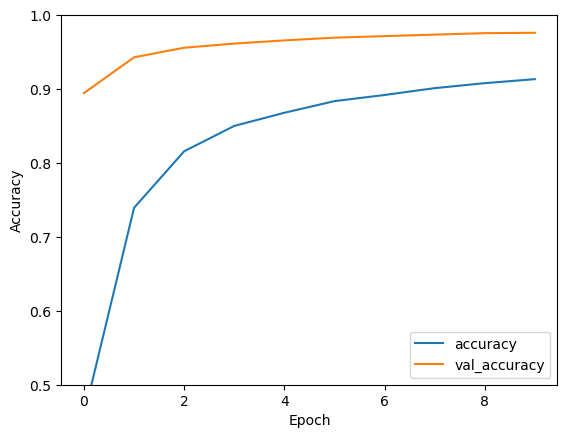

In [11]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')
plt.show()


In [12]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print(f"Test accuracy: {test_acc}")

313/313 - 2s - 5ms/step - accuracy: 0.9761 - loss: 0.0738
Test accuracy: 0.9761000275611877
